In [68]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
# General imports
import os
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

In [70]:
mae = make_mae(bkgd, sgnl)

# LR Plots with Naive Implementation

In [71]:
num = 3
reps = 100
Ns = 10**np.arange(2, 8)

mu = 0.1
bkgd = stats.norm(-mu, 1)
sgnl = stats.norm(mu, 1)

# Model parameters
bce_params = {'loss':bce}
mse_params = {'loss':mse}
mlc_params = {'loss':mlc, 'output':'relu'}
sqr_params = {'loss':sqr, 'output':'relu'}

bce_filestr = 'models/loss_comp/set_' + str(num) + '/bce/model_{}_{}.h5'
mse_filestr = 'models/loss_comp/set_' + str(num) + '/mse/model_{}_{}.h5'
mlc_filestr = 'models/loss_comp/set_' + str(num) + '/mlc/model_{}_{}.h5'
sqr_filestr = 'models/loss_comp/set_' + str(num) + '/sqr/model_{}_{}.h5'

## Mean Absolute Errors

In [ ]:
# Calculate mean absolute errors
bce_mae_avg = []
mse_mae_avg = []
mlc_mae_avg = []
sqr_mae_avg = []

for N in Ns:
    print(N)
    bce_lrs = [None] * reps
    mse_lrs = [None] * reps
    mlc_lrs = [None] * reps
    sqr_lrs = [None] * reps
    for i in range(reps):
        bce_model = create_model()
        bce_model.load_weights(bce_filestr.format(N, i))
        bce_lrs[i] = odds_lr(bce_model)

        mse_model = create_model()
        mse_model.load_weights(mse_filestr.format(N, i))
        mse_lrs[i] = odds_lr(mse_model)

        mlc_model = create_model(output = mlc_params['output'])
        mlc_model.load_weights(mlc_filestr.format(N, i))
        mlc_lrs[i] = pure_lr(mlc_model)

        sqr_model = create_model(output = sqr_params['output'])
        sqr_model.load_weights(sqr_filestr.format(N, i))
        sqr_lrs[i] = pure_lr(sqr_model)
    
    bce_maes = [mae(lr) for lr in bce_lrs]
    mse_maes = [mae(lr) for lr in mse_lrs]
    mlc_maes = [mae(lr) for lr in mlc_lrs]
    sqr_maes = [mae(lr) for lr in sqr_lrs]
    
    bce_mae_avg += [np.mean(bce_maes)]
    mse_mae_avg += [np.mean(mse_maes)]
    mlc_mae_avg += [np.mean(mlc_maes)]
    sqr_mae_avg += [np.mean(sqr_maes)]

bce_mae_avg = np.array(bce_mae_avg)
mse_mae_avg = np.array(mse_mae_avg)
mlc_mae_avg = np.array(mlc_mae_avg)
sqr_mae_avg = np.array(sqr_mae_avg)

100


In [ ]:
# Plot MAEs
fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(Ns, bce_mae_avg, c='brown', ls=':', label='BCE')
plt.plot(Ns, mse_mae_avg, c='green', ls='--', label='MSE')
plt.plot(Ns, mlc_mae_avg, c='red', ls='--', label='MLC')
plt.plot(Ns, sqr_mae_avg, c='blue', ls='-.', label='SQR')
plt.legend()

plt.xscale("log", base=10)
plt.minorticks_on()
plt.tick_params(direction='in', which='both',length=5)
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$N$')

plt.title(r"$\mu_{\rm{sgnl}}="+str(0.1)+r", \mu_{\rm{bkgd}}="+str(-0.1)+r"$",
          loc="right",
          fontsize=20);
plt.savefig('plots/may_9/naive_maes.png',
            dpi=1200, 
            bbox_inches='tight')

## Likelihood Ratios

In [ ]:
N = 10**6
reps = 100

In [ ]:
# Load in models.
bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps
for i in range(reps):
    bce_model = create_model()
    bce_model.load_weights(bce_filestr.format(N, i))
    bce_lrs[i] = odds_lr(bce_model)
    
    mse_model = create_model()
    mse_model.load_weights(mse_filestr.format(N, i))
    mse_lrs[i] = odds_lr(mse_model)
    
    mlc_model = create_model(output = mlc_params['output'])
    mlc_model.load_weights(mlc_filestr.format(N, i))
    mlc_lrs[i] = pure_lr(mlc_model)
    
    sqr_model = create_model(output = sqr_params['output'])
    sqr_model.load_weights(sqr_filestr.format(N, i))
    sqr_lrs[i] = pure_lr(sqr_model)

In [ ]:
lr = make_lr(bkgd, sgnl)

In [ ]:
bce_lr = avg_lr(get_preds(bce_lrs)) + ('BCE',)
mse_lr = avg_lr(get_preds(mse_lrs)) + ('MSE',)
mlc_lr = avg_lr(get_preds(mlc_lrs)) + ('MLC',)
sqr_lr = avg_lr(get_preds(sqr_lrs)) + ('SQR',)

bce_lrr = avg_lrr(lr, get_preds(bce_lrs)) + ('BCE',)
mse_lrr = avg_lrr(lr, get_preds(mse_lrs)) + ('MSE',)
mlc_lrr = avg_lrr(lr, get_preds(mlc_lrs)) + ('MLC',)
sqr_lrr = avg_lrr(lr, get_preds(sqr_lrs)) + ('SQR',)

In [ ]:
lr_plot([bce_lr, mse_lr, mlc_lr, sqr_lr], 
        lr,
        bkgd, sgnl,
        filename='plots/may_9/naive_lrs.png')

In [ ]:
lrr_plot([bce_lrr, mse_lrr, mlc_lrr, sqr_lrr], 
         lr,
         bkgd, sgnl,
         filename='plots/may_9/naive_lrrs.png')

# $C$ Parametrizations

## MLC

In [44]:
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'output':'relu'}
params_2 = {'loss':square_mlc, 'output':'linear'}
params_3 = {'loss':exp_mlc, 'output':'linear'}

filestr_1 = 'models/mlc_c_param/set_' + str(num) + '/linear/mlc_model_{}.h5'
filestr_2 = 'models/mlc_c_param/set_' + str(num) + '/square/square_mlc_model_{}.h5'
filestr_3 = 'models/mlc_c_param/set_' + str(num) + '/exp/exp_mlc_model_{}.h5'

In [45]:
# Get model likelihood ratios.
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps
for i in range(reps):
    model_1 = create_model(output = params_1['output'])
    model_2 = create_model(output = params_2['output'])
    model_3 = create_model(output = params_3['output'])
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1)
    lrs_2[i] = square_lr(model_2)
    lrs_3[i] = exp_lr(model_3)

In [46]:
lr_1 = avg_lr(get_preds(lrs_1)) + ('MLC (linear)',)
lr_2 = avg_lr(get_preds(lrs_2)) + ('MLC (square)',)
lr_3 = avg_lr(get_preds(lrs_3)) + ('MLC (exponential)',)

lrr_1 = avg_lrr(lr, get_preds(lrs_1)) + ('MLC (linear)',)
lrr_2 = avg_lrr(lr, get_preds(lrs_2)) + ('MLC (square)',)
lrr_3 = avg_lrr(lr, get_preds(lrs_3)) + ('MLC (exponential)',)

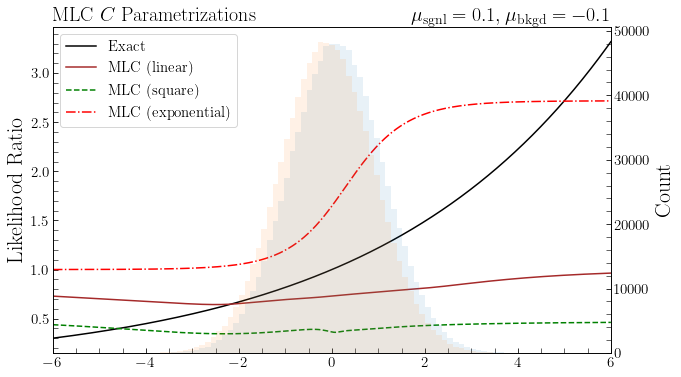

In [47]:
lr_plot([lr_1, lr_2, lr_3], 
        lr,
        bkgd, sgnl,
        title=r'MLC $C$ Parametrizations',
        filename='plots/may_9/mlc_c_param_lrs.png')

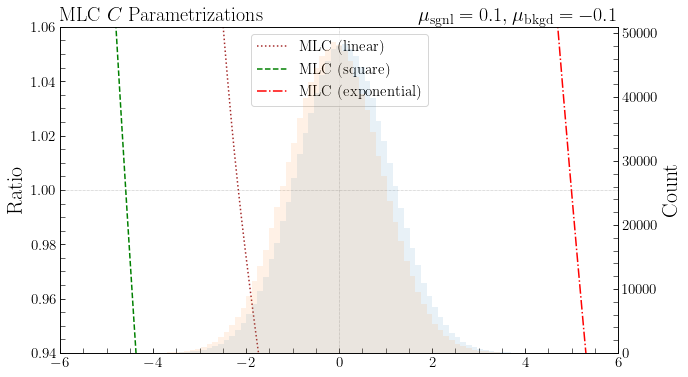

In [48]:
lrr_plot([lrr_1, lrr_2, lrr_3], 
         lr,
         bkgd, sgnl,
         title=r'MLC $C$ Parametrizations',
         filename='plots/may_9/mlc_c_param_lrrs.png')

## SQR

In [49]:
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'output':'relu'}
params_2 = {'loss':square_sqr, 'output':'linear'}
params_3 = {'loss':exp_sqr, 'output':'linear'}

filestr_1 = 'models/sqr_c_param/set_' + str(num) + '/linear/sqr_model_{}.h5'
filestr_2 = 'models/sqr_c_param/set_' + str(num) + '/square/square_sqr_model_{}.h5'
filestr_3 = 'models/sqr_c_param/set_' + str(num) + '/exp/exp_sqr_model_{}.h5'

In [50]:
# Get model likelihood ratios.
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps
for i in range(reps):
    model_1 = create_model(output = params_1['output'])
    model_2 = create_model(output = params_2['output'])
    model_3 = create_model(output = params_3['output'])
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1)
    lrs_2[i] = square_lr(model_2)
    lrs_3[i] = exp_lr(model_3)

In [51]:
lr_1 = avg_lr(get_preds(lrs_1)) + ('SQR (linear)',)
lr_2 = avg_lr(get_preds(lrs_2)) + ('SQR (square)',)
lr_3 = avg_lr(get_preds(lrs_3)) + ('SQR (exponential)',)

lrr_1 = avg_lrr(lr, get_preds(lrs_1)) + ('SQR (linear)',)
lrr_2 = avg_lrr(lr, get_preds(lrs_2)) + ('SQR (square)',)
lrr_3 = avg_lrr(lr, get_preds(lrs_3)) + ('SQR (exponential)',)

TypeError: avg_lrr() missing 1 required positional argument: 'preds'

In [ ]:
lr_plot([lr_1, lr_2, lr_3], 
        lr,
        bkgd, sgnl,
        title=r'SQR $C$ Parametrizations',
        filename='plots/may_9/sqr_c_param_lrs.png'.format(num))

In [ ]:
lrr_plot([lrr_1, lrr_2, lrr_3], 
         lr, 
         bkgd, sgnl,
         title=r'SQR $C$ Parametrizations',
         filename='plots/may_9/sqr_c_param_lrrs.png'.format(num))

# $A/B$ Parametrizations

## SQR

In [ ]:
num = 2
reps = 20

ps = np.round(np.linspace(-2, 2, 81), 2)
sqr_filestr = 'models/sqr_ab_param/set_' + str(num) + '/linear/model_{}_{}.h5'
exp_filestr = 'models/sqr_ab_param/set_' + str(num) + '/exp/model_{}_{}.h5'

In [ ]:
# Get model likelihood ratios.
sqr_lrs = {}
exp_lrs = {}
for p in ps:
    print(p)
    sqr_lrs[p] = [None] * reps
    exp_lrs[p] = [None] * reps
    sqr_params = {'loss': get_sqr(p), 'output':'relu'}
    exp_params = {'loss': get_exp_sqr(p), 'output':'linear'}
    for i in range(reps):
        sqr_model = create_model(sqr_params['output'])
        exp_model = create_model(exp_params['output'])
        sqr_model.load_weights(sqr_filestr.format(p, i))
        exp_model.load_weights(exp_filestr.format(p, i))
        sqr_lrs[p][i] = pow_lr(sqr_model, p)
        exp_lrs[p][i] = exp_pow_lr(exp_model, p)
        print(i, end = ' ')
    print()

In [ ]:
sqr_mae_avg = []
exp_mae_avg = []

for p in ps:
    sqr_maes = [mae(lr) for lr in sqr_lrs[p]]
    exp_maes = [mae(lr) for lr in exp_lrs[p]]
    
    sqr_mae_avg += [np.mean(sqr_maes)]
    exp_mae_avg += [np.mean(exp_maes)]
    print(p, '\t', sqr_mae_avg[-1], '\t', exp_mae_avg[-1])

In [ ]:
sqr_mae_avg = np.array(sqr_mae_avg)
sqr_mae_err = np.array(sqr_mae_err)
exp_mae_avg = np.array(exp_mae_avg)
exp_mae_err = np.array(exp_mae_err)

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(ps, sqr_mae_avg, c='blue', label='linear')
plt.plot(ps, exp_mae_avg, c='red', label='exponential')
plt.legend()

plt.minorticks_on()
plt.tick_params(direction='in', which='both',length=5)
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$p$')

plt.title(r"$\mu_{\rm{sgnl}}="+str(mu)+r", \mu_{\rm{bkgd}}="+str(-mu)+r"$",
          loc="right",
          fontsize=20);
plt.title(r"SQR $A/B$ Parametrization",loc="left",fontsize=20);
plt.savefig('plots/may_9/sqr_ab_param_maes.png'.format(num), 
            dpi=1200, 
            bbox_inches='tight')

## MSE

In [ ]:
num = 0
reps = 20

ps = np.round(np.linspace(-4, 4, 161), 2)
filestr = 'models/mse_ab_param/set_' + str(num) + '/model_{}_{}.h5'

In [ ]:
# Get model likelihood ratios.
lrs = {}
for p in ps:
    print(p)
    lrs[p] = [None] * reps
    params = {'loss': get_mse(p)}
    for i in range(reps):
        model = create_model()
        model.load_weights(filestr.format(p, i))
        lrs[p][i] = pow_odds_lr(model, p) #### FIX THIS
        print(i, end = ' ')
    print()

In [ ]:
mae_avg = []
mae_err = []

for p in ps:
    maes = [mae(lr) for lr in lrs[p]]
    mae_avg += [np.mean(maes)]
    print(p, '\t', mae_avg[-1])

In [ ]:
mae_avg = np.array(mae_avg)

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(ps, mae_avg, c='blue')

plt.minorticks_on()
plt.tick_params(direction='in', which='both',length=5)
plt.ylim(0, 0.5)

plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$p$')

plt.title(r"$\mu_{\rm{sgnl}}="+str(mu)+r", \mu_{\rm{bkgd}}="+str(-mu)+r"$",
          loc="right",
          fontsize=20);
plt.title(r"MSE $A/B$ Parametrization",loc="left",fontsize=20);
plt.savefig('plots/may_9/mse_ab_param_maes.png'.format(num), 
            dpi=1200, 
            bbox_inches='tight')

# Optimized Performances

In [66]:
num = 0
reps = 100
Ns = 10**np.arange(2, 8)

bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(0.1, 1)
mae = make_mae(bkgd, sgnl)

# Model parameters
bce_params = {'loss':bce}
mse_params = {'loss':mse}
mlc_params = {'loss':exp_mlc, 'output':'relu'}
sqr_params = {'loss':exp_sqr, 'output':'relu'}

bce_filestr = 'models/loss_comp/set_' + str(num) + '/bce/bce_model_{}_{}.h5'
mse_filestr = 'models/loss_comp/set_' + str(num) + '/mse/mse_model_{}_{}.h5'
mlc_filestr = 'models/loss_comp/set_' + str(num) + '/mlc/mlc_model_{}_{}.h5'
sqr_filestr = 'models/loss_comp/set_' + str(2) + '/sqr/model_{}_{}.h5'

## Mean Absolute Errors

In [67]:
# Calculate mean absolute errors
bce_mae_avg = []
mse_mae_avg = []
mlc_mae_avg = []
sqr_mae_avg = []

for N in Ns:
    print(N)
    bce_lrs = [None] * reps
    mse_lrs = [None] * reps
    mlc_lrs = [None] * reps
    sqr_lrs = [None] * reps
    for i in range(reps):
        bce_model = create_model()
        bce_model.load_weights(bce_filestr.format(N, i))
        bce_lrs[i] = odds_lr(bce_model)

        mse_model = create_model()
        mse_model.load_weights(mse_filestr.format(N, i))
        mse_lrs[i] = odds_lr(mse_model)

        mlc_model = create_model(output = mlc_params['output'])
        mlc_model.load_weights(mlc_filestr.format(N, i))
        mlc_lrs[i] = exp_lr(mlc_model)

        sqr_model = create_model(output = sqr_params['output'])
        sqr_model.load_weights(sqr_filestr.format(N, i))
        sqr_lrs[i] = exp_lr(sqr_model)
    
    bce_maes = [mae(lr) for lr in bce_lrs]
    mse_maes = [mae(lr) for lr in mse_lrs]
    mlc_maes = [mae(lr) for lr in mlc_lrs]
    sqr_maes = [mae(lr) for lr in sqr_lrs]
    
    bce_mae_avg += [np.mean(bce_maes)]
    mse_mae_avg += [np.mean(mse_maes)]
    mlc_mae_avg += [np.mean(mlc_maes)]
    sqr_mae_avg += [np.mean(sqr_maes)]

bce_mae_avg = np.array(bce_mae_avg)
mse_mae_avg = np.array(mse_mae_avg)
mlc_mae_avg = np.array(mlc_mae_avg)
sqr_mae_avg = np.array(sqr_mae_avg)

100
1000
10000
100000


KeyboardInterrupt: 

In [ ]:
# Plot MAEs
fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(Ns, bce_mae_avg, c='brown', ls=':', label='BCE')
plt.plot(Ns, mse_mae_avg, c='green', ls='--', label='MSE')
plt.plot(Ns, mlc_mae_avg, c='red', ls='--', label='MLC')
plt.plot(Ns, sqr_mae_avg, c='blue', ls='-.', label='SQR')
plt.legend()

plt.xscale("log", base=10)
plt.minorticks_on()
plt.tick_params(direction='in', which='both',length=5)
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$N$')

plt.title(r"$\mu_{\rm{sgnl}}="+str(mu)+r", \mu_{\rm{bkgd}}="+str(-mu)+r"$",
          loc="right",
          fontsize=20);
plt.savefig('plots/may_9/best_maes.png',
            dpi=1200, 
            bbox_inches='tight')

## Likelihood Ratios

In [ ]:
N = 10**6
reps = 100

In [ ]:
# Load in models.
bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps
for i in range(reps):
    bce_model = create_model()
    bce_model.load_weights(bce_filestr.format(N, i))
    bce_lrs[i] = odds_lr(bce_model)
    
    mse_model = create_model()
    mse_model.load_weights(mse_filestr.format(N, i))
    mse_lrs[i] = odds_lr(mse_model)
    
    mlc_model = create_model(mlc_params['output'])
    mlc_model.load_weights(mlc_filestr.format(N, i))
    mlc_lrs[i] = exp_lr(mlc_model)
    
    sqr_model = create_model(sqr_params['output'])
    sqr_model.load_weights(sqr_filestr.format(N, i))
    sqr_lrs[i] = exp_lr(sqr_model)

In [ ]:
bce_lr = avg_lr(get_preds(bce_lrs)) + ('BCE',)
mse_lr = avg_lr(get_preds(mse_lrs)) + ('MSE',)
mlc_lr = avg_lr(get_preds(mlc_lrs)) + ('MLC',)
sqr_lr = avg_lr(get_preds(sqr_lrs)) + ('SQR',)

bce_lrr = avg_lrr(lr, get_preds(bce_lrs)) + ('BCE',)
mse_lrr = avg_lrr(lr, get_preds(mse_lrs)) + ('MSE',)
mlc_lrr = avg_lrr(lr, get_preds(mlc_lrs)) + ('MLC',)
sqr_lrr = avg_lrr(lr, get_preds(sqr_lrs)) + ('SQR',)

In [ ]:
lr_plot([bce_lr, mse_lr, mlc_lr, sqr_lr],
        lr,
        bkgd, sgnl,
        filename='plots/may_9/best_lrs.png')

In [ ]:
lrr_plot([bce_lrr, mse_lrr, mlc_lrr, sqr_lrr], 
         lr,
         bkgd, sgnl,
         filename='plots/may_9/best_lrrs.png')

# Backup 2: Moving Gaussians

In [ ]:
num = 5
N = 10**6
mus = np.round(np.linspace(0.1, 1.4, 14), 2)
ds = 2 * mus # distances between gaussians

reps = 50

# Model parameters
bce_params = {'loss':bce}
mse_params = {'loss':mse}
mlc_params = {'loss':exp_mlc, 'output':'linear'}
sqr_params = {'loss':exp_sqr, 'output':'linear'}

bce_filestr = 'models/interp/set_' + str(num) + '/bce/model_{}_{}.h5'
mse_filestr = 'models/interp/set_' + str(num) + '/mse/model_{}_{}.h5'
mlc_filestr = 'models/interp/set_' + str(num) + '/mlc/model_{}_{}.h5'
sqr_filestr = 'models/interp/set_' + str(num) + '/sqr/model_{}_{}.h5'

In [ ]:
# Calculate mean absolute errors
bce_mae_avg = []
mse_mae_avg = []
mlc_mae_avg = []
sqr_mae_avg = []

bce_mpe_avg = []
mse_mpe_avg = []
mlc_mpe_avg = []
sqr_mpe_avg = []

for mu in mus:
    print(mu)
    bkgd = stats.norm(mu, 1)
    sgnl = stats.norm(mu, 1)
    
    bce_lrs = [None] * reps
    mse_lrs = [None] * reps
    mlc_lrs = [None] * reps
    sqr_lrs = [None] * reps
    for i in range(reps):
        bce_model = create_model()
        bce_model.load_weights(bce_filestr.format(mu, i))
        bce_lrs[i] = odds_lr(bce_model)

        mse_model = create_model()
        mse_model.load_weights(mse_filestr.format(mu, i))
        mse_lrs[i] = odds_lr(mse_model)

        mlc_model = create_model(mlc_params['output'])
        mlc_model.load_weights(mlc_filestr.format(mu, i))
        mlc_lrs[i] = exp_lr(mlc_model)

        sqr_model = create_model(sqr_params['output'])
        sqr_model.load_weights(sqr_filestr.format(mu, i))
        sqr_lrs[i] = exp_lr(sqr_model)
    
    mae = make_mae(bkgd, sgnl)
    bce_maes = [mae(lr) for lr in bce_lrs]
    mse_maes = [mae(lr) for lr in mse_lrs]
    mlc_maes = [mae(lr) for lr in mlc_lrs]
    sqr_maes = [mae(lr) for lr in sqr_lrs]
    
    bce_mae_avg += [np.mean(bce_maes)]
    mse_mae_avg += [np.mean(mse_maes)]
    mlc_mae_avg += [np.mean(mlc_maes)]
    sqr_mae_avg += [np.mean(sqr_maes)]
    print(bce_mae_avg[-1], mse_mae_avg[-1], mlc_mae_avg[-1], sqr_mae_avg[-1])
    
    
    mpe = make_mpe(bkgd, sgnl)
    bce_mpes = [mpe(lr) for lr in bce_lrs]
    mse_mpes = [mpe(lr) for lr in mse_lrs]
    mlc_mpes = [mpe(lr) for lr in mlc_lrs]
    sqr_mpes = [mpe(lr) for lr in sqr_lrs]
    
    bce_mpe_avg += [np.mean(bce_mpes)]
    mse_mpe_avg += [np.mean(mse_mpes)]
    mlc_mpe_avg += [np.mean(mlc_mpes)]
    sqr_mpe_avg += [np.mean(sqr_mpes)]
    print(bce_mpe_avg[-1], mse_mpe_avg[-1], mlc_mpe_avg[-1], sqr_mpe_avg[-1])

In [ ]:
bce_mae_avg = np.array(bce_mae_avg)
mse_mae_avg = np.array(mse_mae_avg)
mlc_mae_avg = np.array(mlc_mae_avg)
sqr_mae_avg = np.array(sqr_mae_avg)

bce_mpe_avg = np.array(bce_mpe_avg)
mse_mpe_avg = np.array(mse_mpe_avg)
mlc_mpe_avg = np.array(mlc_mpe_avg)
sqr_mpe_avg = np.array(sqr_mpe_avg)

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(ds, bce_mae_avg, c='brown', ls=':', label='BCE')
plt.plot(ds, mse_mae_avg, c='green', ls='--', label='MSE')
plt.plot(ds, mlc_mae_avg, c='red', ls='--', label='MLC')
plt.plot(ds, sqr_mae_avg, c='blue', ls='-.', label='SQR')
plt.legend()

plt.yscale("log", basey=10)
plt.minorticks_on()
plt.tick_params(direction='in', which='both',length=5)
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$Distance$')

plt.savefig('plots/may_9/moving_means_maes.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(ds, bce_mpe_avg, c='brown', ls=':', label='BCE')
plt.plot(ds, mse_mpe_avg, c='green', ls='--', label='MSE')
plt.plot(ds, mlc_mpe_avg, c='red', ls='--', label='MLC')
plt.plot(ds, sqr_mpe_avg, c='blue', ls='-.', label='SQR')
plt.legend()
#plt.ylim(0, 5)

#plt.xscale("log", base=10)
plt.minorticks_on()
plt.tick_params(direction='in', which='both',length=5)
plt.ylabel('Mean Percent Error (\%)')
plt.xlabel(r'$Distance$')

plt.savefig('plots/may_9/moving_means_mpes.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

# Backup 3: Other Distributions

# Backup 4: $C$ Parametrizations for BCE & MSE

## BCE

In [ ]:
num = 0
reps = 10
mu = 0.1

# Model parameters
params_1 = {'loss':mlc, 'output':'relu'}
params_2 = {'loss':square_mlc, 'output':'linear'}
params_3 = {'loss':exp_mlc, 'output':'linear'}

filestr_1 = 'models/bce_c_param/set_' + str(num) + '/linear/model_{}.h5'
filestr_2 = 'models/bce_c_param/set_' + str(num) + '/square/model_{}.h5'
filestr_3 = 'models/bce_c_param/set_' + str(num) + '/exp/model_{}.h5'

In [ ]:
# Get model likelihood ratios.
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps
for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1)
    lrs_2[i] = square_odds_lr(model_2)
    lrs_3[i] = exp_odds_lr(model_3)

In [ ]:
# Get average predictions and errors. Add on the labels for plotting.
lr_1 = avg_lr(get_preds(lrs_1)) + ('BCE (linear)',)
lr_2 = avg_lr(get_preds(lrs_2)) + ('BCE (square)',)
lr_3 = avg_lr(get_preds(lrs_3)) + ('BCE (exponential)',)

lrr_1 = avg_lrr(get_preds(lrs_1)) + ('BCE (linear)',)
lrr_2 = avg_lrr(get_preds(lrs_2)) + ('BCE (square)',)
lrr_3 = avg_lrr(get_preds(lrs_3)) + ('BCE (exponential)',)

In [ ]:
lr_plot([lr_1, lr_2, lr_3], 
        r'BCE $C$ Parametrizations',
        filename='plots/may_9/bce_c_param_lrs.png')

In [ ]:
lrr_plot([lrr_1, lrr_2, lrr_3], 
         r'BCE $C$ Parametrizations',
         filename='plots/may_9/bce_c_param_lrrs.png')

## MSE

In [ ]:
num = 0
reps = 10
mu = 0.1

# Model parameters
params_1 = {'loss':mse}
params_2 = {'loss':square_mse, 'output':'linear'}
params_3 = {'loss':exp_mse, 'output':'linear'}

filestr_1 = 'models/mse_c_param/set_' + str(num) + '/linear/model_{}.h5'
filestr_2 = 'models/mse_c_param/set_' + str(num) + '/square/model_{}.h5'
filestr_3 = 'models/mse_c_param/set_' + str(num) + '/exp/model_{}.h5'

In [ ]:
# Get model likelihood ratios.
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps
for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1)
    lrs_2[i] = square_odds_lr(model_2)
    lrs_3[i] = exp_odds_lr(model_3)

In [ ]:
# Get average predictions and errors. Add on the labels for plotting.
lr_1 = avg_lr(get_preds(lrs_1)) + ('MSE (linear)',)
lr_2 = avg_lr(get_preds(lrs_2)) + ('MSE (square)',)
lr_3 = avg_lr(get_preds(lrs_3)) + ('MSE (exponential)',)

lrr_1 = avg_lrr(get_preds(lrs_1)) + ('MSE (linear)',)
lrr_2 = avg_lrr(get_preds(lrs_2)) + ('MSE (square)',)
lrr_3 = avg_lrr(get_preds(lrs_3)) + ('MSE (exponential)',)

In [ ]:
lr_plot([lr_1, lr_2, lr_3], 
        r'MSE $C$ Parametrizations',
        filename='plots/may_9/mse_c_param_lrs.png')

In [ ]:
lrr_plot([lrr_1, lrr_2, lrr_3], 
         r'MSE $C$ Parametrizations',
         filename='plots/may_9/mse_c_param_lrrs.png')

# Backup 5: Plots of C Parametrization Functions (?)